In [61]:
#Import NEST libraries
import nest
import nest.voltage_trace

In [62]:
#Reset the simulation time
nest.ResetKernel()

In [63]:
#Create a spiking neuron using "integrate-and-fire" dynamics with conductance-based synapses
neuron = nest.Create('iaf_cond_alpha')

In [64]:
#Create an external excitatory poisson input
poisson_ext_input = nest.Create('poisson_generator',
                                {'rate': 6000.0})

In [65]:
#Create an external Gaussian excitatory input
gaussian_noise = nest.Create('noise_generator',
                             {'mean': 50, 
                              'std': 100})

In [66]:
#Create a spike dectector (has been renamed to spike_recorder in new NEST versions) to record the spikes from the neuron
spike_record = nest.Create('spike_recorder')

In [67]:
#Create a voltmeter to record membrane potential
voltmeter = nest.Create('voltmeter')

In [68]:
#Connect neuron with the devices
nest.Connect(poisson_ext_input, neuron)
nest.Connect(gaussian_noise, neuron)
nest.Connect(voltmeter,neuron)
nest.Connect(neuron, spike_record)

In [69]:
#Run simulation for 1000 ms
simulation_time = int(input())
nest.Simulate(simulation_time)

 1000



Feb 12 14:04:17 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Feb 12 14:04:17 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Feb 12 14:04:17 SimulationManager::run [Info]: 
    Simulation finished.


[[<matplotlib.lines.Line2D at 0x7fdcf57c32b0>]]

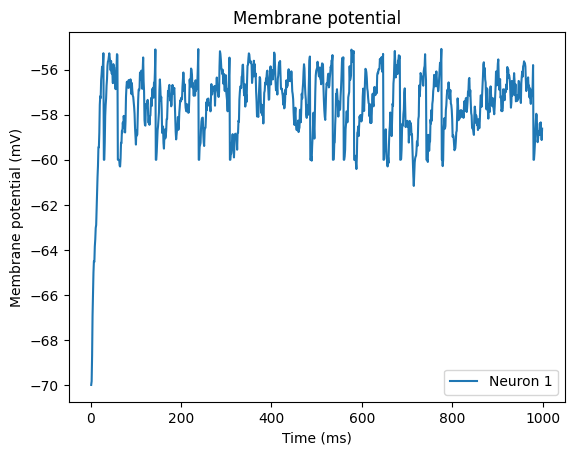

In [70]:
#To plot the membrane potential as a function of time
nest.voltage_trace.from_device(voltmeter)

In [71]:
#Get output from the spike_recorder device
nest.GetStatus(spike_record)

({'element_type': 'recorder',
  'events': {'senders': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
   'times': array([ 28.3,  59.6, 143.2, 238.1, 307.8, 485.5, 535.4, 559.8, 583. ,
          647.3, 684.5, 743. , 776.5, 979.7])},
  'frozen': False,
  'global_id': 4,
  'label': '',
  'local': True,
  'model': 'spike_recorder',
  'model_id': 89,
  'n_events': 14,
  'node_uses_wfr': False,
  'origin': 0.0,
  'record_to': 'memory',
  'start': 0.0,
  'stop': 1.7976931348623157e+308,
  'thread': 0,
  'thread_local_id': 3,
  'time_in_steps': False,
  'vp': 0},)

In [72]:
sr = nest.GetStatus(spike_record,keys="events")[0]
evnts = sr["senders"]
t = sr["times"]

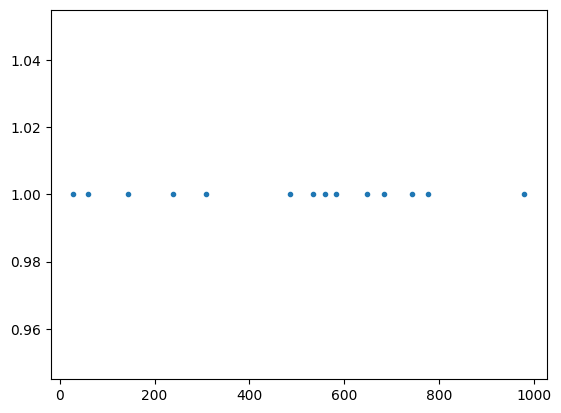

In [73]:
#To plot output from spike_recorder
#import numpy
import pylab

pylab.figure(1)
pylab.plot(t, evnts, ".")
#pylab.xticks(numpy.arange(0, 1000, step=50))
pylab.show()

In [74]:
#To determine output firing rate
op_firing_rate = spike_record.get('n_events') / (simulation_time * (10**-3))

In [77]:
print("The output firing rate for a poisson input rate of", poisson_ext_input.get('rate'), "Hz is", op_firing_rate, "Hz")

The output firing rate for a poisson input rate of 6000.0 Hz is 14.0 Hz
